# Load BSON files

In [518]:
import os
import numpy as np
import bson

def getBsonFiles(DIR):
    files = os.listdir(DIR)
    bson_files = []

    for f in files:
        if ".bson" in f:
            bson_files.append(f)

    print(bson_files)
    return bson_files

In [519]:
DATA_DIR = os.getcwd() + "/data/fddg-db10/fddg"

In [520]:
bson_files = getBsonFiles(DATA_DIR)

['users.bson', 'metas.bson', 'chunks.bson']


In [521]:
bson_data = {}

for b in bson_files:
    with open(DATA_DIR + "/" + b, "rb") as f:
        bson_data[b] = bson.decode_all(f.read())

# Load all BSON data into class objects

In [522]:
class Meta:
    def __init__(self, json_doc):
        self._id = json_doc["_id"]
        self.subject_id = json_doc["subject_id"]
        self.phone_placement = json_doc["phone_placement"]
        self.recording_duration = json_doc["recording_duration"]
        self.chunk_ids = json_doc["chunk_ids"]
        
class Chunk:
    def __init__(self, json_doc):
        self._id = json_doc["_id"]
        self.recording_id = json_doc["recording_id"]
        self.chunk_index = json_doc["chunk_index"]
        self.labels = json_doc["labels"]
        self.p_ecg = json_doc["p_ecg"]
        self.p_hr = json_doc["p_hr"]
        self.p_contact = json_doc["p_contact"]
        self.p_acc_x = json_doc["p_acc_x"]
        self.p_acc_y = json_doc["p_acc_y"]
        self.p_acc_z = json_doc["p_acc_z"]
        self.acc_x = json_doc["acc_x"]
        self.acc_y = json_doc["acc_y"]
        self.acc_z = json_doc["acc_z"]
        self.gyr_x = json_doc["gyr_x"]
        self.gyr_y = json_doc["gyr_y"]
        self.gyr_z = json_doc["gyr_z"]
        self.gra_x = json_doc["gra_x"]
        self.gra_y = json_doc["gra_y"]
        self.gra_z = json_doc["gra_z"]
        self.mag_x = json_doc["mag_x"]
        self.mag_y = json_doc["mag_y"]
        self.mag_z = json_doc["mag_z"]
        self.att_roll = json_doc["att_roll"]
        self.att_pitch = json_doc["att_pitch"]
        self.att_yaw = json_doc["att_yaw"]
        self.delta_heading = json_doc["delta_heading"]
        
class User:
    def __init__(self, json_doc):
        self.subject_id = json_doc["subject_id"]
        self.name = json_doc["name"]
        self.yob = json_doc["yob"]
        self.height = json_doc["height"]
        self.weight = json_doc["weight"]
        self.is_female = json_doc["is_female"]
        self.medical_conditions = json_doc["medical_conditions"]

In [523]:
metas = []
rec_chunks = {}
chunks = {}
users = {}

In [524]:
# Metas
for doc in bson_data[bson_files[1]]:
    meta = Meta(doc)
    metas.append(meta)
    
# Chunks
for doc in bson_data[bson_files[2]]:
    chunk = Chunk(doc)
    print(chunk._id)
    print(chunk.recording_id)
    print()
    
    if chunk.recording_id in rec_chunks.keys():
        rec_chunks[chunk.recording_id].append(chunk)
    else:
        rec_chunks[chunk.recording_id] = [chunk]
    
    chunks[chunk._id] = chunk

# Users
for doc in bson_data[bson_files[0]]:
    user = User(doc)
    users[user.subject_id] = user

952F789A-CF4E-492B-A2D3-508B1BF7CD4B
24617921-CAF0-4FC0-8590-C01A98B490EE

34FA0329-1446-4766-ABA3-777D9036CF94
24617921-CAF0-4FC0-8590-C01A98B490EE

26A87DFD-B151-4D54-BC59-2917DEEEF6E0
24617921-CAF0-4FC0-8590-C01A98B490EE

C2FE85B1-C35F-496D-8E80-C9A1092FBCF7
24617921-CAF0-4FC0-8590-C01A98B490EE

A850D4EF-20E4-432F-8514-756866F2D939
24617921-CAF0-4FC0-8590-C01A98B490EE

8D6689EA-EEC9-4555-9A2A-58BE1E67B0C3
24617921-CAF0-4FC0-8590-C01A98B490EE

0BB7C4D8-E758-4416-B5C3-C0E0E85C51F8
24617921-CAF0-4FC0-8590-C01A98B490EE

FC795ED4-2C01-4DFF-844F-509ADAC694EA
24617921-CAF0-4FC0-8590-C01A98B490EE

9420F0E8-3A0B-49D0-A5BE-4277D11CAF96
24617921-CAF0-4FC0-8590-C01A98B490EE

DEAF2050-DCCD-48D7-BE1E-6E8086B78F90
24617921-CAF0-4FC0-8590-C01A98B490EE

EA5A3AFA-068A-4DF8-A2D8-C4246D6D1BB0
24617921-CAF0-4FC0-8590-C01A98B490EE

426FC3EF-E57A-43BC-A165-AD5FB62DC1DF
3D6EB8A7-6255-4A7F-ACBA-797CF023A0ED

8370EF55-CCE4-458A-9BC4-0E2FDB7F26F6
3D6EB8A7-6255-4A7F-ACBA-797CF023A0ED

F1491412-3F09-4E43-B044-F

In [527]:
for c in rec_chunks["EBDF23BC-1923-4240-9AA4-0222E0A44161"]:
    print(c.chunk_index)
    print(len(c.labels))
    print(len(c.p_ecg))
    print(len(c.p_acc_x))
    print(len(c.acc_x))
    print(len(c.p_hr))
    print()

0
50
650
1000
49
5

1
50
650
1000
50
5

2
50
650
1000
51
5

3
50
650
1000
50
5

4
20
0
0
20
0



In [528]:
for c in rec_chunks["3D6EB8A7-6255-4A7F-ACBA-797CF023A0ED"]:
    print(c.chunk_index)
    print(len(c.labels))
    print(len(c.p_ecg))
    print(len(c.p_acc_x))
    print(len(c.acc_x))
    print(len(c.p_hr))
    print()

0
50
650
1000
49
5

1
50
650
1000
51
5

2
50
650
1000
50
5

3
50
650
1000
50
5

4
50
650
1000
51
5



# Merge all chunks and meta data into a single object for each recording

In [529]:
class Recording:
    def __init__(self, meta):
        self._id = meta._id
        self.subject_id = meta.subject_id
        self.phone_placement = meta.phone_placement
        self.recording_duration = meta.recording_duration
        self.chunk_ids = meta.chunk_ids
        self.labels = []
        self.p_ecg = []
        self.p_hr = []
        self.p_contact = []
        self.p_acc_x = []
        self.p_acc_y = []
        self.p_acc_z = []
        self.acc_x = []
        self.acc_y = []
        self.acc_z = []
        self.gyr_x = []
        self.gyr_y = []
        self.gyr_z = []
        self.gra_x = []
        self.gra_y = []
        self.gra_z = []
        self.mag_x = []
        self.mag_y = []
        self.mag_z = []
        self.att_roll = []
        self.att_pitch = []
        self.att_yaw = []
        self.delta_heading = []
        
        print(self._id)
        r_chunks = rec_chunks[self._id]
        for c in r_chunks:
            print(c._id)
        print()
        ordered_chunk_ids = {}
        
        for chunk in r_chunks:
            ordered_chunk_ids[chunk.chunk_index] = chunk
            
        for i in range(1,len(r_chunks)-1):
            chunk = chunks[ordered_chunk_ids[i]._id]
            
            assert(i == chunk.chunk_index)
            
            self.labels += chunk.labels
            self.p_ecg += chunk.p_ecg
            self.p_hr += chunk.p_hr
            self.p_contact += chunk.p_contact
            self.p_acc_x += chunk.p_acc_x
            self.p_acc_y += chunk.p_acc_y
            self.p_acc_z += chunk.p_acc_z
            self.acc_x += chunk.acc_x
            self.acc_y += chunk.acc_y
            self.acc_z += chunk.acc_z
            self.gyr_x += chunk.gyr_x
            self.gyr_y += chunk.gyr_y
            self.gyr_z += chunk.gyr_z
            self.gra_x += chunk.gra_x
            self.gra_y += chunk.gra_y
            self.gra_z += chunk.gra_z
            self.mag_x += chunk.mag_x
            self.mag_y += chunk.mag_y
            self.mag_z += chunk.mag_z
            self.att_roll += chunk.att_roll
            self.att_pitch += chunk.att_pitch
            self.att_yaw += chunk.att_yaw
            self.delta_heading += chunk.delta_heading

            print(len(chunk.labels))
            print(len(chunk.p_ecg))
            print(len(chunk.p_hr))
            print(len(chunk.p_acc_x))
            print(len(chunk.p_contact))
            print(len(chunk.acc_x))
            print()
            
        print(len(self.labels))
        print(len(self.p_ecg))
        print(len(self.p_hr))
        print(len(self.p_acc_x))
        print(len(self.p_contact))
        print(len(self.acc_x))
        print()
            

In [530]:
recordings = []

In [531]:
for meta in metas:
    recordings.append(Recording(meta))

3D6EB8A7-6255-4A7F-ACBA-797CF023A0ED
426FC3EF-E57A-43BC-A165-AD5FB62DC1DF
8370EF55-CCE4-458A-9BC4-0E2FDB7F26F6
F1491412-3F09-4E43-B044-F6B659895B5E
D6F9BC35-BD49-4D5B-9B43-58B2F5020434
AC698139-AAFD-47E2-80EA-362FF99DDC90

50
650
5
1000
5
51

50
650
5
1000
5
50

50
650
5
1000
5
50

150
1950
15
3000
15
151

EBDF23BC-1923-4240-9AA4-0222E0A44161
7BF80CAB-B637-4E8C-BB00-E170519EB1B4
1928E0AC-78F9-4FD4-B14D-8ABA553CDE57
8DCE3DFC-CB47-43F9-B13E-D4CDDB903718
D8BEDC37-6925-4D20-9EC1-0AA7D6463707
B8E82B90-3796-471C-8EBA-2EC398C58BD9

50
650
5
1000
5
50

50
650
5
1000
5
51

50
650
5
1000
5
50

150
1950
15
3000
15
151



In [533]:
for r in recordings:
    print(r.recording_duration)

-1
22.000000000000043


# Visualize fall

In [534]:
import matplotlib.pyplot as plt

In [535]:
def getFallIndexes(labels):
    val = True
    sublist = labels
    idxs = []
    lastIdx = 0

    while len(sublist) > 0:
        if val in sublist:
            idx = sublist.index(val)
            idxs.append(lastIdx + idx)
            sublist = labels[lastIdx + idx:]
            val = not val
            lastIdx += idx
        else:
            sublist = []
            
    return idxs

In [536]:
def plot_time(data, labels):
    print(len(data))
    print(len(data)/len(labels))
    print()
    
    mu = sum(data)/len(data)
    data = [el-mu for el in data]
    
    if abs(min(data)) > max(data):
        data = [el/abs(min(data)) for el in data]
    else:
        data = [el/max(data) for el in data]
        
    idxs = getFallIndexes(labels)
    
    for idx in idxs:
        plt.plot([idx]*2, np.linspace(-2,2,2),color="red")
    
    plt.plot(np.arange(0, len(data))*len(labels)/len(data), data)
    plt.xticks(np.linspace(0, len(labels), len(labels)), labels, rotation=90, fontsize=4)
    plt.ylim(-1.1,1.1)
    
def plot_recording(rec):
    plt.clf()
    plot_time(rec.p_ecg, rec.labels)
    plot_time(rec.p_acc_x, rec.labels)
    plot_time(rec.p_acc_y, rec.labels)
    plot_time(rec.p_acc_z, rec.labels)
    plot_time(rec.acc_x, rec.labels)
    plot_time(rec.acc_y, rec.labels)
    plot_time(rec.acc_z, rec.labels)
    plot_time(rec.gra_x, rec.labels)
    plot_time(rec.gra_y, rec.labels)
    plot_time(rec.gra_z, rec.labels)
    plot_time(rec.gyr_x, rec.labels)
    plot_time(rec.gyr_y, rec.labels)
    plot_time(rec.gyr_z, rec.labels)
    plot_time(rec.mag_x, rec.labels)
    plot_time(rec.mag_y, rec.labels)
    plot_time(rec.mag_z, rec.labels)
    plot_time(rec.delta_heading, rec.labels)
    plot_time(rec.att_pitch, rec.labels)
    plot_time(rec.att_roll, rec.labels)
    plot_time(rec.att_yaw, rec.labels)
    plt.show()

In [537]:
for r in recordings:
    print(r._id)

3D6EB8A7-6255-4A7F-ACBA-797CF023A0ED
EBDF23BC-1923-4240-9AA4-0222E0A44161


1950
13.0

3000
20.0

3000
20.0

3000
20.0

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666



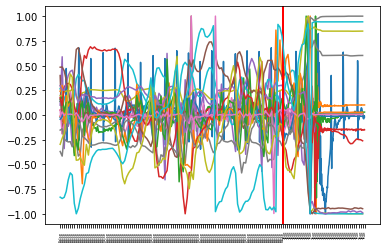

In [538]:
plt.clf()
plot_recording(recordings[0])

1950
13.0

3000
20.0

3000
20.0

3000
20.0

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666

151
1.0066666666666666



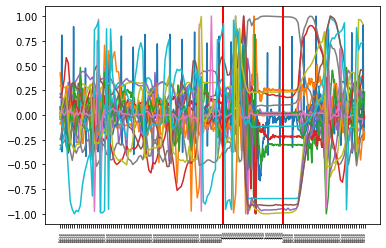

In [539]:
plt.clf()
plot_recording(recordings[1])

1950
13.0



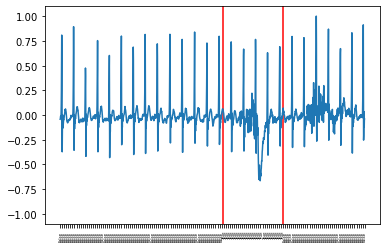

In [540]:
plot_time(recordings[1].p_ecg, recordings[1].labels)

1950
13.0



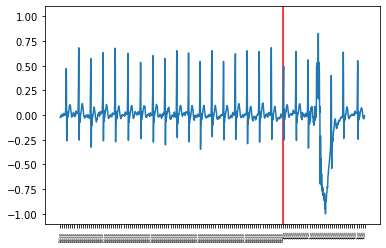

In [541]:
plot_time(recordings[0].p_ecg, recordings[0].labels)

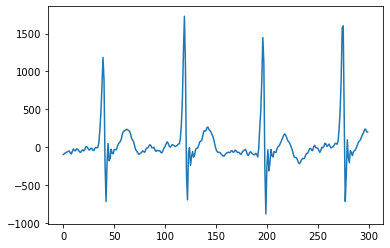

In [545]:
plt.plot(range(len(recordings[0].p_ecg))[0:300], recordings[0].p_ecg[0:300])

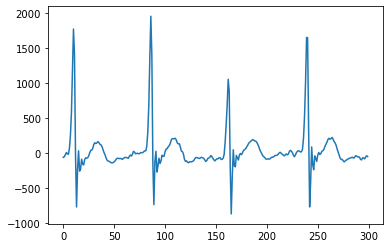

In [546]:
plt.plot(range(len(recordings[1].p_ecg))[0:300], recordings[1].p_ecg[0:300])